# Predicting On-time Delivery of Online Purchases
## Part III-A: Modeling - Logistic Regression, X1, X2
## AAI-510 Team 7 Final Project

Team 7:  Ken Devoe, Tyler Foreman, Geoffrey Fadera

University of San Diego, Applied Artificial Intelligence

Date:  June 24, 2024

GitHub Repository: https://github.com/kdevoe/aai510-group7

## Import Common Functions

In [117]:
%run shipping_common_functions.ipynb

## Imports

In [139]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## Load Preprocessed Data

In [96]:
# train data
X_train = pd.read_csv('./data/x_train.csv')
y_train = np.ravel(pd.read_csv('./data/y_train.csv'))

# val data
X_val = pd.read_csv('./data/x_val.csv')
y_val = np.ravel(pd.read_csv('./data/y_val.csv'))

In [97]:
# Check imported data
print('TRAIN SET:')
print('   X_train:', X_train.shape)
print('   y_train:', y_train.shape)
print('\nVALIDATION SET:')
print('   X_val:', X_val.shape)
print('   y_val:', y_val.shape)

TRAIN SET:
   X_train: (8799, 17)
   y_train: (8799,)

VALIDATION SET:
   X_val: (1100, 17)
   y_val: (1100,)


In [98]:
X_train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
0,-0.925605,5,-0.670120,-0.378680,1,-0.392911,0.311901,0,0,0,0,1,0,0,1,1,0
1,1.697108,3,-0.173246,0.273631,2,-0.638968,0.532606,1,0,0,0,0,0,0,1,1,0
2,-1.799843,5,1.379486,-0.378680,2,-0.454426,-1.585178,0,0,0,1,0,0,0,1,0,1
3,0.822870,5,0.178707,-1.030992,2,-0.577454,0.406052,0,0,1,0,0,0,0,1,0,1
4,1.697108,3,1.772845,0.273631,1,-0.577454,-1.207352,0,0,1,0,0,1,0,0,1,0


In [99]:
X_val.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
0,-0.051367,2,1.213861,-1.030992,2,-0.700483,0.237314,0,0,0,1,0,0,1,0,1,0
1,-0.051367,2,-0.421683,-0.378680,2,-0.392911,0.697675,1,0,0,0,0,0,1,0,0,1
2,-0.051367,1,-0.297464,-1.030992,1,-0.638968,0.689116,0,0,0,1,0,0,0,1,0,1
3,-0.925605,3,-0.152543,-0.378680,2,-0.392911,0.826674,0,0,0,1,0,1,0,0,0,1
4,0.822870,5,0.779096,0.925943,2,-0.331397,-1.066126,1,0,0,0,0,1,0,0,0,1


## Model 1: Logistic Regression

A simple Logistic Regression is used to establish a baseline performance. 
Default parameter values are used.

### Model 1: Create, Train Model

In [100]:
# create model instance
model1 = []
model1 = LogisticRegression(solver='liblinear', random_state=0)

#fit the model using the training data
model1.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

### Model 1: Describe/Visualize Model

In [101]:
model1_featcoeff = pd.DataFrame({ 'features': model1.feature_names_in_,
                                  'coef' : np.ravel(model1.coef_)})

model1_featcoeff.set_index('features').sort_values('coef')

,coef
features,
Weight_in_gms,-0.380287
Customer_care_calls,-0.127812
Prior_purchases,-0.122080
Cost_of_the_Product,-0.109246
Product_importance,-0.096254
Customer_rating,0.022963
Warehouse_block_A,0.027294
Warehouse_block_D,0.091684
Warehouse_block_F,0.099142


Holding other features constant, **Discount_offered** contributes the most to timely arrival of shipments while **Weight_in_gms** contributes the most to late arrival. This is consistent with our EDA analysis (section 'General Correlation between Variables')

### Model 1: Performance on Validation Set

In [102]:
# predict y values based on the validation set
y_pred1 = model1.predict(X_val)

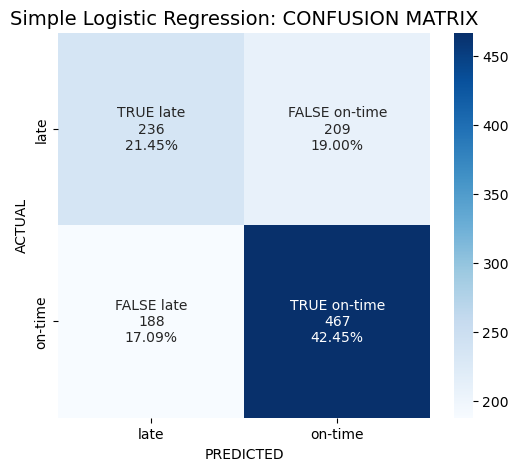

In [118]:
# generate confusion matrix for model1
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred1, title = 'Simple Logistic Regression')

In [119]:
# Generate Classification Report for model 1
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred1, title = 'Simple Logistic Regression')
    

Simple Logistic Regression: CLASSIFICATION REPORT

              precision    recall  f1-score   support

        late       0.56      0.53      0.54       445
     on-time       0.69      0.71      0.70       655

    accuracy                           0.64      1100
   macro avg       0.62      0.62      0.62      1100
weighted avg       0.64      0.64      0.64      1100



## Model 2: K Nearest Neighbor

....

### Model 2: Create, train, evaluate as many KNN models as there are K-values

In [168]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [169]:
k_values = list(range(1, 20))
acc_train = []
acc_val = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    y_pred_train = knn.predict(X_train)
    
    y_pred_val = knn.predict(X_val)
    
    acc_train.append(accuracy_score(y_train, y_pred_train))
    acc_val.append(accuracy_score(y_val, y_pred_val))

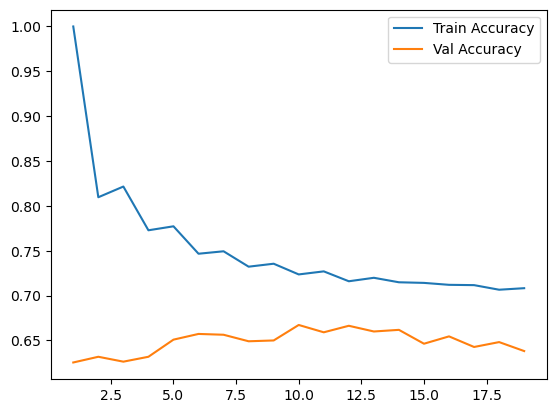

In [170]:
plt.plot(k_values, acc_train, label = 'Train Accuracy')
plt.plot(k_values, acc_val, label = 'Val Accuracy')
plt.legend()


In [171]:
# select k_value with highest Validation accuracy

k_best = acc_val.index(max(acc_val))
k_best

9

In [172]:
# select another k_value with least overfitting
delta = np.subtract(acc_train, acc_val)
k_best2 = delta.argmin()
k_best2

11

In [173]:
# generate kNN model (again) using n_neighbors that gave the highest validation accuraxy

model2 = KNeighborsClassifier(n_neighbors=k_best)
    
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

### Model 2: Performance on Validation Set

In [174]:
# predict y values based on the validation set
y_pred2 = model2.predict(X_val)

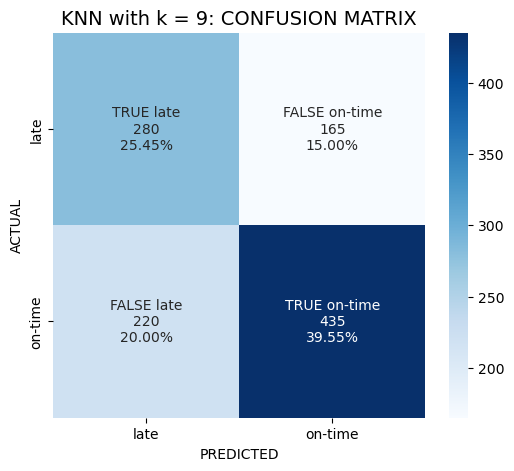

In [175]:
# generate confusion matrix for model2
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred2, title = f'KNN with k = {k_best}')

In [176]:
# Generate Classification Report for model 2
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred2, title = f'KNN with k = {k_best}')

KNN with k = 9: CLASSIFICATION REPORT

              precision    recall  f1-score   support

        late       0.56      0.63      0.59       445
     on-time       0.72      0.66      0.69       655

    accuracy                           0.65      1100
   macro avg       0.64      0.65      0.64      1100
weighted avg       0.66      0.65      0.65      1100



In [157]:
# tuning
# initialize model
model2_tune = KNeighborsClassifier()

# setup search grid
k_values = list(range(1, 20))

param2_grid = { 
    'n_neighbors' : k_values,
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 20, 40, 10, 50]
}


In [158]:
# run search
CV_knn = GridSearchCV(estimator=model2_tune, param_grid=param2_grid, cv=5, verbose=2)
CV_knn.fit(X_train, y_train)

Fitting 5 folds for each of 285 candidates, totalling 1425 fits
[CV] END ...algorithm=ball_tree, leaf_size=30, n_neighbors=1; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=30, n_neighbors=1; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=30, n_neighbors=1; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=30, n_neighbors=1; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=30, n_neighbors=1; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=30, n_neighbors=2; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=30, n_neighbors=2; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=30, n_neighbors=2; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=30, n_neighbors=2; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=30, n_neighbors=2; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=30, n_neighbors=3; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=30

[CV] END ...algorithm=ball_tree, leaf_size=20, n_neighbors=2; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=20, n_neighbors=2; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=20, n_neighbors=3; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=20, n_neighbors=3; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=20, n_neighbors=3; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=20, n_neighbors=3; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=20, n_neighbors=3; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=20, n_neighbors=4; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=20, n_neighbors=4; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=20, n_neighbors=4; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=20, n_neighbors=4; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=20, n_neighbors=4; total time=   0.1s
[CV] END ...algorithm=ball_t

[CV] END ...algorithm=ball_tree, leaf_size=40, n_neighbors=4; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=40, n_neighbors=4; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=40, n_neighbors=4; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=40, n_neighbors=4; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=40, n_neighbors=4; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=40, n_neighbors=5; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=40, n_neighbors=5; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=40, n_neighbors=5; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=40, n_neighbors=5; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=40, n_neighbors=5; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=40, n_neighbors=6; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=40, n_neighbors=6; total time=   0.1s
[CV] END ...algorithm=ball_t

[CV] END ...algorithm=ball_tree, leaf_size=10, n_neighbors=5; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=10, n_neighbors=5; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=10, n_neighbors=6; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=10, n_neighbors=6; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=10, n_neighbors=6; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=10, n_neighbors=6; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=10, n_neighbors=6; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=10, n_neighbors=7; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=10, n_neighbors=7; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=10, n_neighbors=7; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=10, n_neighbors=7; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=10, n_neighbors=7; total time=   0.1s
[CV] END ...algorithm=ball_t

[CV] END ...algorithm=ball_tree, leaf_size=50, n_neighbors=7; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=50, n_neighbors=7; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=50, n_neighbors=7; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=50, n_neighbors=7; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=50, n_neighbors=7; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=50, n_neighbors=8; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=50, n_neighbors=8; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=50, n_neighbors=8; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=50, n_neighbors=8; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=50, n_neighbors=8; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=50, n_neighbors=9; total time=   0.1s
[CV] END ...algorithm=ball_tree, leaf_size=50, n_neighbors=9; total time=   0.1s
[CV] END ...algorithm=ball_t

[CV] END .....algorithm=kd_tree, leaf_size=30, n_neighbors=8; total time=   0.1s
[CV] END .....algorithm=kd_tree, leaf_size=30, n_neighbors=8; total time=   0.1s
[CV] END .....algorithm=kd_tree, leaf_size=30, n_neighbors=8; total time=   0.1s
[CV] END .....algorithm=kd_tree, leaf_size=30, n_neighbors=9; total time=   0.1s
[CV] END .....algorithm=kd_tree, leaf_size=30, n_neighbors=9; total time=   0.1s
[CV] END .....algorithm=kd_tree, leaf_size=30, n_neighbors=9; total time=   0.1s
[CV] END .....algorithm=kd_tree, leaf_size=30, n_neighbors=9; total time=   0.1s
[CV] END .....algorithm=kd_tree, leaf_size=30, n_neighbors=9; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=30, n_neighbors=10; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=30, n_neighbors=10; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=30, n_neighbors=10; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=30, n_neighbors=10; total time=   0.1s
[CV] END ....algorithm=kd_tr

[CV] END .....algorithm=kd_tree, leaf_size=20, n_neighbors=9; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=20, n_neighbors=10; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=20, n_neighbors=10; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=20, n_neighbors=10; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=20, n_neighbors=10; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=20, n_neighbors=10; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=20, n_neighbors=11; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=20, n_neighbors=11; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=20, n_neighbors=11; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=20, n_neighbors=11; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=20, n_neighbors=11; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=20, n_neighbors=12; total time=   0.1s
[CV] END ....algorithm=kd_tr

[CV] END ....algorithm=kd_tree, leaf_size=40, n_neighbors=11; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=40, n_neighbors=11; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=40, n_neighbors=11; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=40, n_neighbors=12; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=40, n_neighbors=12; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=40, n_neighbors=12; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=40, n_neighbors=12; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=40, n_neighbors=12; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=40, n_neighbors=13; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=40, n_neighbors=13; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=40, n_neighbors=13; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=40, n_neighbors=13; total time=   0.1s
[CV] END ....algorithm=kd_tr

[CV] END ....algorithm=kd_tree, leaf_size=10, n_neighbors=12; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=10, n_neighbors=13; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=10, n_neighbors=13; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=10, n_neighbors=13; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=10, n_neighbors=13; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=10, n_neighbors=13; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=10, n_neighbors=14; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=10, n_neighbors=14; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=10, n_neighbors=14; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=10, n_neighbors=14; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=10, n_neighbors=14; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=10, n_neighbors=15; total time=   0.1s
[CV] END ....algorithm=kd_tr

[CV] END ....algorithm=kd_tree, leaf_size=50, n_neighbors=14; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=50, n_neighbors=14; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=50, n_neighbors=14; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=50, n_neighbors=15; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=50, n_neighbors=15; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=50, n_neighbors=15; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=50, n_neighbors=15; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=50, n_neighbors=15; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=50, n_neighbors=16; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=50, n_neighbors=16; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=50, n_neighbors=16; total time=   0.1s
[CV] END ....algorithm=kd_tree, leaf_size=50, n_neighbors=16; total time=   0.1s
[CV] END ....algorithm=kd_tr

[CV] END ......algorithm=brute, leaf_size=30, n_neighbors=16; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=30, n_neighbors=16; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=30, n_neighbors=16; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=30, n_neighbors=16; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=30, n_neighbors=17; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=30, n_neighbors=17; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=30, n_neighbors=17; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=30, n_neighbors=17; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=30, n_neighbors=17; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=30, n_neighbors=18; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=30, n_neighbors=18; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=30, n_neighbors=18; total time=   0.0s
[CV] END ......algorithm=bru

[CV] END ......algorithm=brute, leaf_size=20, n_neighbors=18; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=20, n_neighbors=18; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=20, n_neighbors=18; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=20, n_neighbors=19; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=20, n_neighbors=19; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=20, n_neighbors=19; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=20, n_neighbors=19; total time=   0.0s
[CV] END ......algorithm=brute, leaf_size=20, n_neighbors=19; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=40, n_neighbors=1; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=40, n_neighbors=1; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=40, n_neighbors=1; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=40, n_neighbors=1; total time=   0.0s
[CV] END .......algorithm=br

[CV] END .......algorithm=brute, leaf_size=10, n_neighbors=1; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=10, n_neighbors=1; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=10, n_neighbors=1; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=10, n_neighbors=1; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=10, n_neighbors=1; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=10, n_neighbors=2; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=10, n_neighbors=2; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=10, n_neighbors=2; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=10, n_neighbors=2; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=10, n_neighbors=2; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=10, n_neighbors=3; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=10, n_neighbors=3; total time=   0.0s
[CV] END .......algorithm=br

[CV] END .......algorithm=brute, leaf_size=50, n_neighbors=2; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=50, n_neighbors=3; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=50, n_neighbors=3; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=50, n_neighbors=3; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=50, n_neighbors=3; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=50, n_neighbors=3; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=50, n_neighbors=4; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=50, n_neighbors=4; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=50, n_neighbors=4; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=50, n_neighbors=4; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=50, n_neighbors=4; total time=   0.0s
[CV] END .......algorithm=brute, leaf_size=50, n_neighbors=5; total time=   0.0s
[CV] END .......algorithm=br

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 20, 40, 10, 50],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             verbose=2)

In [159]:
# display best found hyperparamater combination
CV_knn.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 19}

In [160]:
# get best model
model2_tune_best = CV_knn.best_estimator_

In [166]:
# predict y values based on the validation set using best model
y_pred2_tuned = model2_tune_best.predict(X_val)

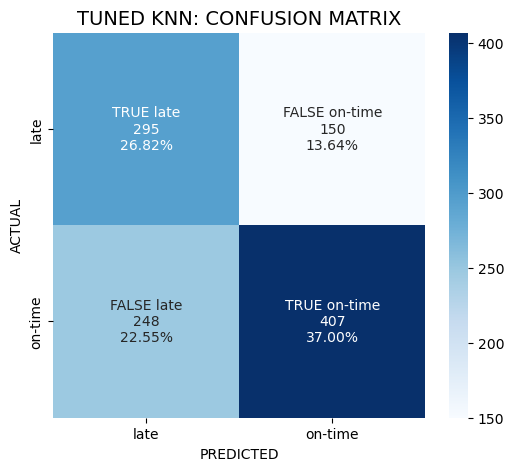

In [167]:
# generate confusion matrix for tuned model 2
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred2_tuned, title ='TUNED KNN')

In [164]:
# Generate Classification Report for tuned model 2
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred2_tuned, title = 'TUNED KNN')

TUNED KNN: CLASSIFICATION REPORT

              precision    recall  f1-score   support

        late       0.54      0.66      0.60       445
     on-time       0.73      0.62      0.67       655

    accuracy                           0.64      1100
   macro avg       0.64      0.64      0.63      1100
weighted avg       0.65      0.64      0.64      1100



## Model 3: Random Forest

....

### Model 3: Create, train, etc

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
model3 = RandomForestClassifier(max_depth=3, random_state=0)
model3.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [135]:
# predict y values based on the validation set
y_pred3 = model3.predict(X_val)

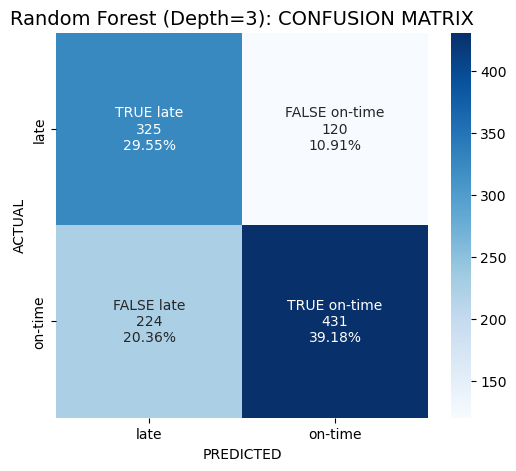

In [136]:
# generate confusion matrix for model2
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred3, title = 'Random Forest (Depth=3)')

In [137]:
# Generate Classification Report for model 3
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred3, title = 'Random Forest (Depth=3)')

Random Forest (Depth=3): CLASSIFICATION REPORT

              precision    recall  f1-score   support

        late       0.59      0.73      0.65       445
     on-time       0.78      0.66      0.71       655

    accuracy                           0.69      1100
   macro avg       0.69      0.69      0.68      1100
weighted avg       0.71      0.69      0.69      1100



In [140]:
#hyper parameter tuning

# initialize model
model3_tune = RandomForestClassifier(random_state=0)

# setup search grid
param_grid = { 
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [2, 3, 4, 5, 7],
    'criterion' :['gini', 'entropy', 'log_loss']
}

In [141]:
# run search
CV_rf = GridSearchCV(estimator=model3_tune, param_grid=param_grid, cv=5, verbose=2)
CV_rf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.2s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.2s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.1s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.2s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.2s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=3; total time=   0.1s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=3; total time=   0.1s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=3; total time=   0.2s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=3; total time=   0.2s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=3; total time=   0.1s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=4; total time=   0.1s
[CV] END ....criterion=gini, max_depth=3, min_s

[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.2s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.1s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.2s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.2s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.2s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.2s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.2s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.2s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.2s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=4; total time=   0.1s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=4; total time=   0.1s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=4; total time=   0.1s
[CV] END .criterion=entropy,

[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=2; total time=   0.2s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=2; total time=   0.2s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=3; total time=   0.2s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=3; total time=   0.1s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=3; total time=   0.2s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=3; total time=   0.2s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=3; total time=   0.2s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=4; total time=   0.1s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=4; total time=   0.1s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=4; total time=   0.1s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=4; total time=   0.2s
[CV] END criterion=log_loss, max_depth=3, min_samples_leaf=4; total time=   0.1s
[CV] END criterion=log_loss,

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [2, 3, 4, 5, 7]},
             verbose=2)

In [142]:
# display best found hyperparamater combination
CV_rf.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4}

In [143]:
# get best model
model3_tune_best = CV_rf.best_estimator_

In [146]:
# predict y values based on the validation set using best model
y_pred3_tuned = model3_tune_best.predict(X_val)

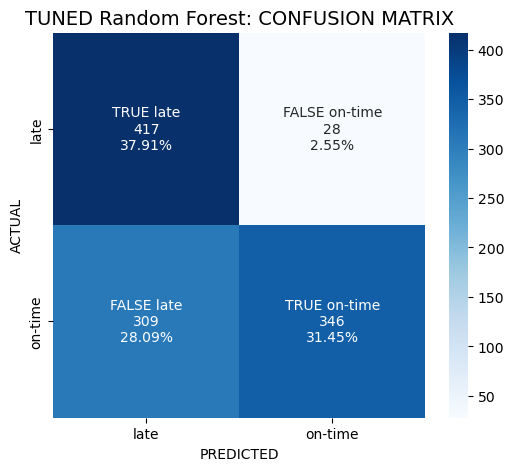

In [149]:
# generate confusion matrix for tuned model 3
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred3_tuned, title ='TUNED Random Forest')

In [150]:
# Generate Classification Report for tuned model 3
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred3_tuned, title = 'TUNED Random Forest')

TUNED Random Forest: CLASSIFICATION REPORT

              precision    recall  f1-score   support

        late       0.57      0.94      0.71       445
     on-time       0.93      0.53      0.67       655

    accuracy                           0.69      1100
   macro avg       0.75      0.73      0.69      1100
weighted avg       0.78      0.69      0.69      1100



TUNED Random Forest (TEST DATA): CLASSIFICATION REPORT

              precision    recall  f1-score   support

        late       0.57      0.92      0.71       450
     on-time       0.91      0.52      0.67       650

    accuracy                           0.69      1100
   macro avg       0.74      0.72      0.69      1100
weighted avg       0.77      0.69      0.68      1100



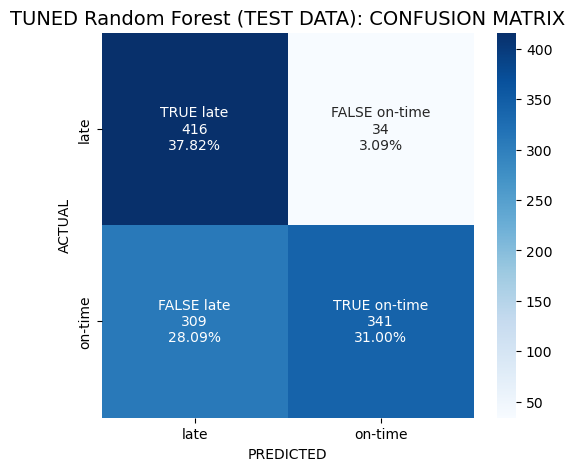

In [151]:
# test data
X_test = pd.read_csv('./data/x_test.csv')
y_test = np.ravel(pd.read_csv('./data/y_test.csv'))

# predict y values based on the validation set using best model
y_pred3_tuned_test = model3_tune_best.predict(X_test)

# generate confusion matrix for tuned model 3
aai510_grp7_confusion_matrix(y_true = y_test, y_pred = y_pred3_tuned_test, title ='TUNED Random Forest (TEST DATA)')

# Generate Classification Report for tuned model 3
aai510_grp7_class_report(y_true = y_test, y_pred = y_pred3_tuned_test, title = 'TUNED Random Forest (TEST DATA)')